#交叉验证法

In [2]:
#导入红酒数据集
from sklearn.datasets import load_wine
#导入交叉验证工具
from sklearn.model_selection import cross_val_score
#导入用于分类的支持向量机模型
from sklearn.svm import SVC
#载入红酒数据集
wine=load_wine()
#设置SVC的核函数为linear
svc=SVC(kernel='linear')
#使用交叉验证发对SVC进行评分
scores=cross_val_score(svc,wine.data,wine.target)
print('交叉验证得分：{}'.format(scores))

D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


交叉验证得分：[0.83333333 0.95       1.        ]


In [3]:
#使用.mean()来获得分数平均值
print('交叉验证平均分：{:.3f}'.format(scores.mean()))

交叉验证平均分：0.928


In [4]:
#设置cv参数为6
scores=cross_val_score(svc,wine.data,wine.target,cv=6)
print('交叉验证得分：\n{}'.format(scores))

交叉验证得分：
[0.86666667 0.9        0.93333333 0.96666667 1.         1.        ]


In [5]:
print('交叉验证平均分:{:.3f}'.format(scores.mean()))

交叉验证平均分:0.944


In [6]:
#打印红酒数据集的分类标签
print('酒的分类标签:\n{}'.format(wine.target))

酒的分类标签:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [7]:
#导入随机差分工具
from sklearn.model_selection import ShuffleSplit
#设置拆分的份数为10个
shuffle_split=ShuffleSplit(test_size=.2,train_size=.7,n_splits=10)
#对拆分好的数据集进行交叉验证
scores=cross_val_score(svc,wine.data,wine.target,cv=shuffle_split)
#打印交叉验证得分
print('随机拆分交叉验证模型得分：\n{}'.format(scores))

随机拆分交叉验证模型得分：
[0.94444444 0.94444444 0.91666667 0.88888889 0.97222222 0.88888889
 0.94444444 1.         0.97222222 0.88888889]


In [8]:
#挨个试试交叉验证法
#导入LeaveOneOut
from sklearn.model_selection import LeaveOneOut
#设置cv参数为leaveoneout
cv=LeaveOneOut()
#重新进行交叉验证
scores=cross_val_score(svc,wine.data,wine.target,cv=cv)
#打印迭代次数
print('迭代次数：{}'.format(len(scores)))
print('模型平均分：{}'.format(scores.mean()))

迭代次数：178
模型平均分：0.9550561797752809


#网格搜索法

In [10]:
#导入套索回归模型
from sklearn.linear_model import Lasso
#导入数据集拆分工具
from sklearn.model_selection import train_test_split
#将数据集拆分为训练集与测试集
X_train,X_test,y_train,y_test=train_test_split(wine.data,wine.target,random_state=38)
#设置初始分数为0
best_score=0
#设置alpha参数遍历0.01,0.1,1和10
for alpha in [0.01,0.1,1.0,10.0]:
    #最大遍历数为100,1000,5000，10000
    for max_iter in [100,1000,5000,10000]:
        lasso=Lasso(alpha=alpha,max_iter=max_iter)
        lasso.fit(X_train,y_train)
        score=lasso.score(X_test,y_test)
        
        if score>best_score:
            best_score=score
            #定义字典，返回最佳参数和最佳迭代数
            best_parameters={'alpha':alpha,'最大迭代次数':max_iter}
print('模型最高分为：{:.3f}'.format(best_score))
print('最佳参数设置为：{}'.format(best_parameters))

模型最高分为：0.889
最佳参数设置为：{'alpha': 0.01, '最大迭代次数': 100}


In [11]:
#导入套索回归模型
from sklearn.linear_model import Lasso
#导入数据集拆分工具
from sklearn.model_selection import train_test_split
#将数据集拆分为训练集与测试集
X_train,X_test,y_train,y_test=train_test_split(wine.data,wine.target,random_state=0)
#设置初始分数为0
best_score=0
#设置alpha参数遍历0.01,0.1,1和10
for alpha in [0.01,0.1,1.0,10.0]:
    #最大遍历数为100,1000,5000，10000
    for max_iter in [100,1000,5000,10000]:
        lasso=Lasso(alpha=alpha,max_iter=max_iter)
        lasso.fit(X_train,y_train)
        score=lasso.score(X_test,y_test)
        
        if score>best_score:
            best_score=score
            #定义字典，返回最佳参数和最佳迭代数
            best_parameters={'alpha':alpha,'最大迭代次数':max_iter}
print('模型最高分为：{:.3f}'.format(best_score))
print('最佳参数设置为：{}'.format(best_parameters))

模型最高分为：0.830
最佳参数设置为：{'alpha': 0.1, '最大迭代次数': 100}


In [12]:
import numpy as np
for alpha in [0.01,0.1,1.0,10.0]:
    #最大遍历数为100,1000,5000，10000
    for max_iter in [100,1000,5000,10000]:
        lasso=Lasso(alpha=alpha,max_iter=max_iter)
        scores=cross_val_score(lasso,X_train,y_train,cv=6)
        score=np.mean(scores)
        if score>best_score:
            best_score=score
            #定义字典，返回最佳参数和最佳迭代数
            best_parameters={'alpha':alpha,'最大迭代次数':max_iter}
print('模型最高分为：{:.3f}'.format(best_score))
print('最佳参数设置为：{}'.format(best_parameters))
        

模型最高分为：0.865
最佳参数设置为：{'alpha': 0.01, '最大迭代次数': 100}


In [13]:
#用最佳参数模型拟合数据
lasso=Lasso(alpha=0.01,max_iter=100).fit(X_train,y_train)
print('测试数据集得分:{:.3f}'.format(lasso.score(X_test,y_test)))

测试数据集得分:0.819


In [14]:
#导入网格搜索工具
from sklearn.model_selection import GridSearchCV
#将需要遍历的参数定义为字典
params={'alpha':[0.01,0.1,1.0,10.0],
       'max_iter':[100,1000,5000,10000]}
#定义网格搜索中使用的模型和参数
grid_search=GridSearchCV(lasso,params,cv=6)
#使用网格搜索模型拟合数据
grid_search.fit(X_train,y_train)
print('模型最高分：{:.3f}'.format(grid_search.score(X_test,y_test)))
print('最优参数：{}'.format(grid_search.best_params_))

模型最高分：0.819
最优参数：{'alpha': 0.01, 'max_iter': 100}


D:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [15]:
#打印王格尔搜索中的best_score_属性：交叉验证所得最高分
print('交叉验证最高得分：{:.3f}'.format(grid_search.best_score_))

交叉验证最高得分：0.865


#分类模型的可信度评估

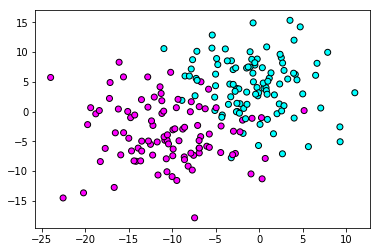

In [18]:
#导入数据集生成工具
from sklearn.datasets import make_blobs
#导入画图工具
import matplotlib.pyplot as plt
#生成样本数为200，分类为2，标准差为5的数据集
X,y=make_blobs(n_samples=200,random_state=1,centers=2,cluster_std=5)
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.cool,edgecolor='k')
plt.show()

In [19]:
#导入高斯贝叶斯模型
from sklearn.naive_bayes import GaussianNB
#将数据集拆分为训练集与测试集
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=68)
#训练高斯贝叶斯模型
gnb=GaussianNB()
gnb.fit(X_train,y_train)
#获得高斯贝叶斯的分类准确概率
predict_proba=gnb.predict_proba(X_test)
print('预测准确率形态：{}'.format(predict_proba.shape))

预测准确率形态：(50, 2)


In [20]:
print(predict_proba[:5])

[[0.98849996 0.01150004]
 [0.0495985  0.9504015 ]
 [0.01648034 0.98351966]
 [0.8168274  0.1831726 ]
 [0.00282471 0.99717529]]


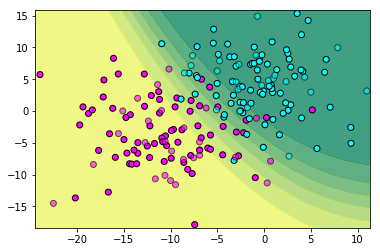

In [21]:
#设定横纵轴范围
x_min,x_max=X[:,0].min()-.5,X[:,0].max()+.5
y_min,y_max=X[:,1].min()-.5,X[:,1].max()+.5
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.2),np.arange(y_min,y_max,0.2))
Z=gnb.predict_proba(np.c_[xx.ravel(),yy.ravel()])[:,1]
Z=Z.reshape(xx.shape)
#绘制等高线
plt.contourf(xx,yy,Z,cmap=plt.cm.summer,alpha=0.8)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=plt.cm.cool,edgecolor='k')
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=plt.cm.cool,edgecolor='k',alpha=0.6)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.show()

In [22]:
#导入SVC模型
from sklearn.svm import SVC
#使用训练集训练模型
svc=SVC().fit(X_train,y_train)
#获得SVC的决定系数
dec_func=svc.decision_function(X_test)
print(dec_func[:5])

[ 0.02082432  0.87852242  1.01696254 -0.30356558  0.95924836]


D:\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


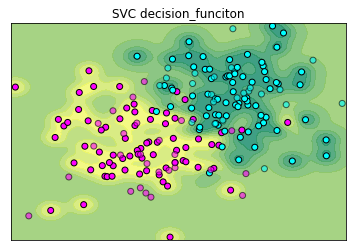

In [23]:
#用图形看decision_function的工作原理
#使用决定系数进行绘图
Z=svc.decision_function(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)
#绘制等高线
plt.contourf(xx,yy,Z,cmap=plt.cm.summer,alpha=0.8)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=plt.cm.cool,edgecolor='k')
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=plt.cm.cool,edgecolor='k',alpha=0.6)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
#设定图集
plt.title('SVC decision_funciton')
plt.xticks(())
plt.yticks(())
plt.show()